In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


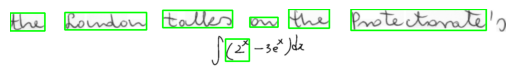

In [5]:
import cv2
import numpy as np

large = cv2.imread(r"C:\Users\prana\Downloads\output\kaggle\working\output\combined_114.png")
rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel = np.ones((5, 5), np.uint8)
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#For opencv 3+ comment the previous line and uncomment the following line
#_, contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

mask = np.zeros(bw.shape, dtype=np.uint8)

for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)

import matplotlib.pyplot as plt
import cv2

rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
plt.imshow(rgb)
plt.axis('off')
plt.show()


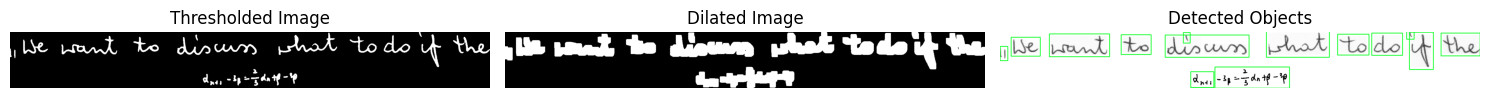

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread(r"C:\Users\prana\Downloads\output\kaggle\working\output\combined_117.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Create rectangular structuring element and dilate
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilate = cv2.dilate(thresh, kernel, iterations=4)

# Find contours and draw rectangle
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 2)

# Use matplotlib to display the images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display the thresholded image
ax[0].imshow(thresh, cmap='gray')
ax[0].set_title('Thresholded Image')
ax[0].axis('off')

# Display the dilated image
ax[1].imshow(dilate, cmap='gray')
ax[1].set_title('Dilated Image')
ax[1].axis('off')

# Display the original image with rectangles
ax[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[2].set_title('Detected Objects')
ax[2].axis('off')

plt.tight_layout()
plt.show()


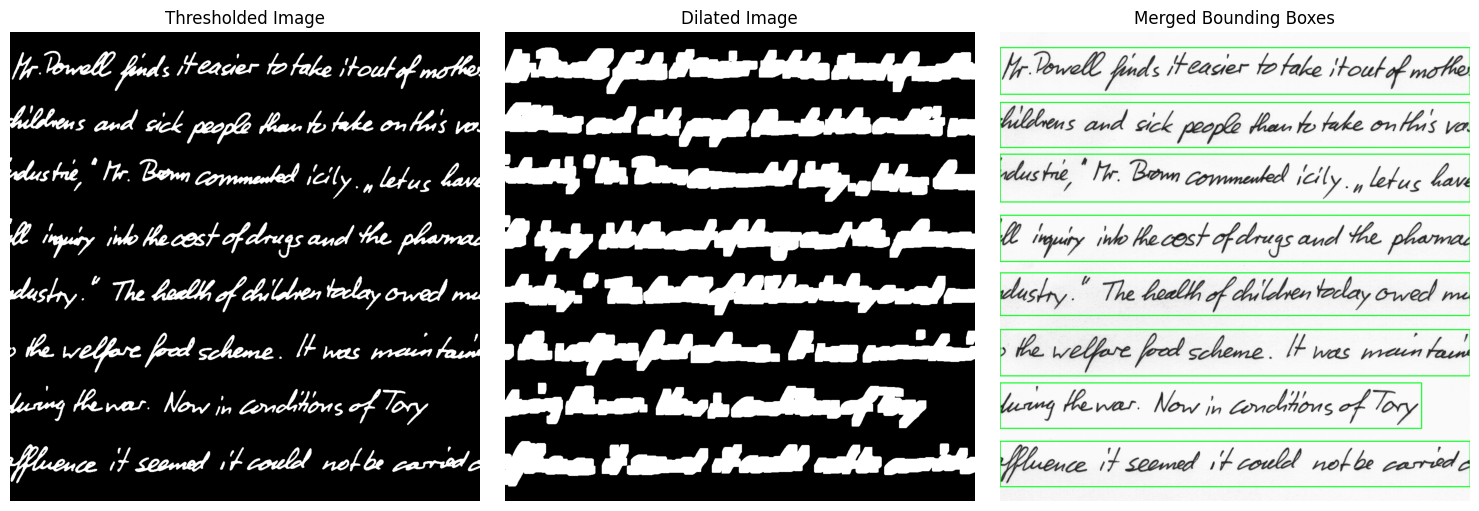

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread(r"C:\Users\prana\Downloads\output\kaggle\working\output\combined_366.png")
image = cv2.imread(r"C:\Users\prana\Downloads\dataset-card.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Create rectangular structuring element and dilate
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilate = cv2.dilate(thresh, kernel, iterations=4)

# Find contours
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Store bounding boxes
bounding_boxes = [cv2.boundingRect(c) for c in cnts]

# Sort bounding boxes by y-coordinate (top to bottom)
bounding_boxes = sorted(bounding_boxes, key=lambda b: b[1])

# Merge bounding boxes at similar heights/levels
merged_boxes = []
for box in bounding_boxes:
    x, y, w, h = box
    if not merged_boxes:
        merged_boxes.append([x, y, x + w, y + h])
    else:
        mx1, my1, mx2, my2 = merged_boxes[-1]
        if abs(y - my1) <= 70:  # Adjust the threshold as needed
            # Merge the boxes
            merged_boxes[-1] = [min(mx1, x), min(my1, y), max(mx2, x + w), max(my2, y + h)]
        else:
            merged_boxes.append([x, y, x + w, y + h])

# Draw merged bounding boxes
for box in merged_boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(image, (x1, y1), (x2, y2), (36, 255, 12), 2)

# Use matplotlib to display the images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display the thresholded image
ax[0].imshow(thresh, cmap='gray')
ax[0].set_title('Thresholded Image')
ax[0].axis('off')

# Display the dilated image
ax[1].imshow(dilate, cmap='gray')
ax[1].set_title('Dilated Image')
ax[1].axis('off')

# Display the original image with merged rectangles
ax[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[2].set_title('Merged Bounding Boxes')
ax[2].axis('off')

plt.tight_layout()
plt.show()


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\prana\anaconda3\envs\tf-gpu\Lib\site-packages\transformers\generation\utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


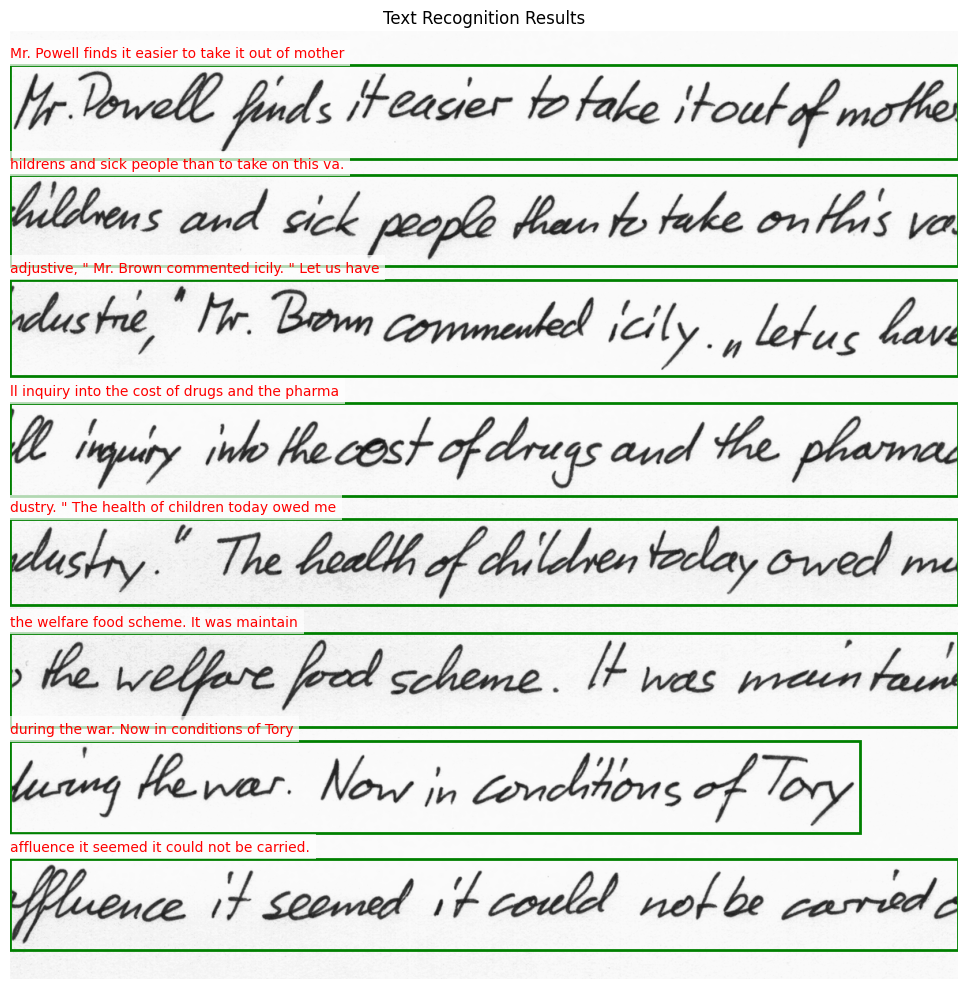

Recognized Texts:
BBox [0, 42, 1200, 161]: Mr. Powell finds it easier to take it out of mother
BBox [0, 182, 1200, 297]: hildrens and sick people than to take on this va.
BBox [0, 314, 1200, 436]: adjustive, " Mr. Brown commented icily. " Let us have
BBox [0, 470, 1200, 588]: ll inquiry into the cost of drugs and the pharma
BBox [0, 617, 1200, 726]: dustry. " The health of children today owed me
BBox [0, 762, 1200, 880]: the welfare food scheme. It was maintain
BBox [0, 898, 1076, 1014]: during the war. Now in conditions of Tory
BBox [0, 1047, 1200, 1163]: affluence it seemed it could not be carried.


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch
from PIL import Image

# Load TrOCR model and processor for handwritten text
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

def preprocess_image(image_path):
    """
    Preprocess the image for text detection and recognition
    """
    # Load image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7, 7), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    # Create rectangular structuring element and dilate
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=4)
    
    # Find contours
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
    # Store bounding boxes
    bounding_boxes = [cv2.boundingRect(c) for c in cnts]
    
    # Sort bounding boxes by y-coordinate (top to bottom)
    bounding_boxes = sorted(bounding_boxes, key=lambda b: b[1])
    
    # Merge bounding boxes at similar heights/levels
    merged_boxes = []
    for box in bounding_boxes:
        x, y, w, h = box
        if not merged_boxes:
            merged_boxes.append([x, y, x + w, y + h])
        else:
            mx1, my1, mx2, my2 = merged_boxes[-1]
            if abs(y - my1) <= 70:  # Adjust the threshold as needed
                # Merge the boxes
                merged_boxes[-1] = [min(mx1, x), min(my1, y), max(mx2, x + w), max(my2, y + h)]
            else:
                merged_boxes.append([x, y, x + w, y + h])
    
    return image, merged_boxes

def recognize_text_in_bbox(image, bbox):
    """
    Recognize text in a given bounding box using TrOCR
    """
    x1, y1, x2, y2 = bbox
    
    # Crop the bounding box region
    cropped = image[y1:y2, x1:x2]
    
    # Convert to PIL Image and ensure it's grayscale
    pil_image = Image.fromarray(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    
    # Preprocess image for TrOCR
    pixel_values = processor(images=pil_image, return_tensors="pt").pixel_values
    
    # Generate text
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    return generated_text

def main(image_path):
    """
    Main function to process image and recognize text in bounding boxes
    """
    # Preprocess image and get bounding boxes
    image, merged_boxes = preprocess_image(image_path)
    
    # Recognize text in each bounding box
    recognized_texts = []
    for bbox in merged_boxes:
        text = recognize_text_in_bbox(image, bbox)
        recognized_texts.append((bbox, text))
    
    # Visualize results
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Text Recognition Results")
    
    for (x1, y1, x2, y2), text in recognized_texts:
        plt.text(x1, y1-10, text, color='red', fontsize=10, 
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                                          fill=False, edgecolor='green', linewidth=2))
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Print recognized texts
    print("Recognized Texts:")
    for (bbox, text) in recognized_texts:
        print(f"BBox {bbox}: {text}")

# Example usage
image_path = r"C:\Users\prana\Downloads\dataset-card.png"
main(image_path)